In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data=data.iloc[:,1:5]

In [6]:
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TV'>

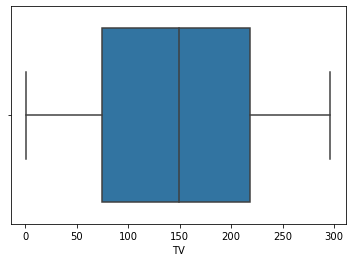

In [10]:
import seaborn as sns
sns.boxplot(data['TV'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Radio'>

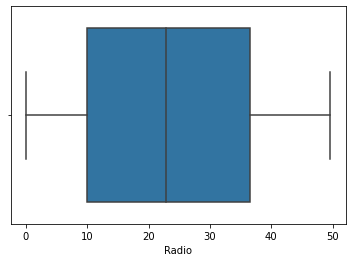

In [11]:
sns.boxplot(data['Radio'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

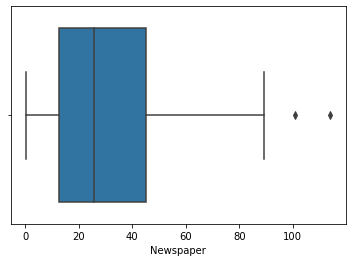

In [12]:
sns.boxplot(data['Newspaper'])

In [14]:
q1=data['Newspaper'].quantile(0.25)
q3=data['Newspaper'].quantile(0.75)
iqr=q3-q1
lower_bond=q1-1.5*iqr+q3
upper_bond=1.5*iqr+q3

In [15]:
def Imputation(values):
    if values > lower_bond:
        return upper_bond
    elif values < lower_bond:
        return lower_bond
    else:
        return values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Newspaper'>

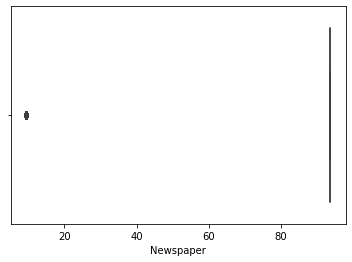

In [16]:
data['Newspaper']=data['Newspaper'].apply(Imputation)

sns.boxplot(data['Newspaper'])

In [17]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,-0.009108,0.782224
Radio,0.054809,1.000000,0.096947,0.576223
Newspaper,-0.009108,0.096947,1.000000,0.071334
Sales,0.782224,0.576223,0.071334,1.000000


In [19]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100,random_state=42)
x=data.iloc[:,0:3]

In [20]:
x

,TV,Radio,Newspaper
0,230.1,37.8,93.625
1,44.5,39.3,93.625
2,17.2,45.9,93.625
3,151.5,41.3,93.625
4,180.8,10.8,93.625
...,...,...,...
195,38.2,3.7,93.625
196,94.2,4.9,9.325
197,177.0,9.3,9.325
198,283.6,42.0,93.625


In [21]:
y=data['Sales']

In [24]:
from sklearn.datasets import make_regression

x,y=make_regression(n_features=4,n_informative=2,random_state=0,shuffle=False)

cls=RandomForestRegressor(max_depth=2,random_state=0)  ##building the random forest model 

cls.fit(x,y)


RandomForestRegressor(max_depth=2, random_state=0)

In [25]:
y_pred=cls.predict(x)  

In [26]:
from sklearn.metrics import r2_score ##finding r-square value

score=r2_score(y,y_pred)

score=round(score,2)*100

print(score)

84.0


In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [32]:
from sklearn.linear_model import LinearRegression ##importing the linear regression 

model=LinearRegression()

model.fit(x_train,y_train)


LinearRegression()

In [33]:
y_pred=model.predict(x_test)

In [34]:
score=r2_score(y_test,y_pred)

score=score*100

print(score) 

100.0


In [35]:
print(y_pred,y_test)

[-24.60719319   0.17626991  32.59386934 -54.23600024 -40.02555297
 -13.81361736  14.08815923 -42.5262156  -70.00907918  49.82290745
 -18.84474658 -29.85246699  10.99216958 -12.73102933  14.44189199
  23.60700003  -2.08694047   8.76446094 -40.341885   -19.3463247 ] [-24.60719319   0.17626991  32.59386934 -54.23600024 -40.02555297
 -13.81361736  14.08815923 -42.5262156  -70.00907918  49.82290745
 -18.84474658 -29.85246699  10.99216958 -12.73102933  14.44189199
  23.60700003  -2.08694047   8.76446094 -40.341885   -19.3463247 ]


Text(0.5, 1.0, 'actual values')

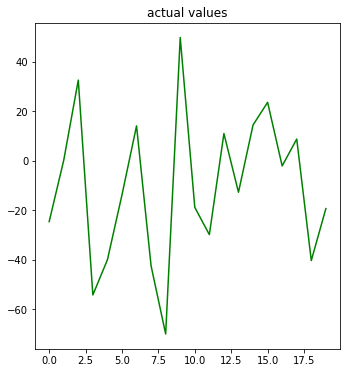

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_test,color="green")
plt.title("actual values") 

Text(0.5, 1.0, 'Predicted values')

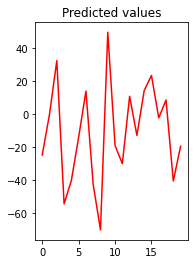

In [37]:
plt.subplot(1,2,2)
plt.plot(y_test,color="red")
plt.title("Predicted values")